In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
features=pd.read_csv('Features data set.csv')
sales=pd.read_csv('sales data-set.csv')
stores=pd.read_csv('stores data-set.csv')

In [3]:
features.head()


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [4]:
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [5]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [6]:
features['Date'] = pd.to_datetime(features['Date'], dayfirst=True)
sales['Date'] = pd.to_datetime(sales['Date'], dayfirst=True)

merged_df = pd.merge(sales, features, on=['Store', 'Date','IsHoliday'], how='inner')

df = pd.merge(merged_df, stores, on='Store', how='inner')

print(df.head())

   Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
0      1     1 2010-02-05      24924.50      False        42.31       2.572   
1      1     2 2010-02-05      50605.27      False        42.31       2.572   
2      1     3 2010-02-05      13740.12      False        42.31       2.572   
3      1     4 2010-02-05      39954.04      False        42.31       2.572   
4      1     5 2010-02-05      32229.38      False        42.31       2.572   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0        NaN        NaN        NaN        NaN        NaN  211.096358   
1        NaN        NaN        NaN        NaN        NaN  211.096358   
2        NaN        NaN        NaN        NaN        NaN  211.096358   
3        NaN        NaN        NaN        NaN        NaN  211.096358   
4        NaN        NaN        NaN        NaN        NaN  211.096358   

   Unemployment Type    Size  
0         8.106    A  151315  
1         8.106    A  151315  

In [7]:
df.describe()

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,2011-06-18 08:30:31.963375360,15981.258123,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739
min,1.000000,1.000000,2010-02-05 00:00:00,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2010-10-08 00:00:00,2079.650000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,2011-06-17 00:00:00,7612.030000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,2012-02-24 00:00:00,20205.852500,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,2012-10-26 00:00:00,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000
std,12.785297,30.492054,NaN,22711.183519,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328


In [8]:
df.shape


(421570, 16)

In [9]:
df.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

In [10]:
df.isna().sum()


Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

In [11]:
df.duplicated().sum()


0

In [12]:
df = df.drop(columns = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4','MarkDown5', 'Size'],axis = 1)

In [13]:
df.head()


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,A
1,1,2,2010-02-05,50605.27,False,42.31,2.572,211.096358,8.106,A
2,1,3,2010-02-05,13740.12,False,42.31,2.572,211.096358,8.106,A
3,1,4,2010-02-05,39954.04,False,42.31,2.572,211.096358,8.106,A
4,1,5,2010-02-05,32229.38,False,42.31,2.572,211.096358,8.106,A


In [14]:
df.nunique()

Store               45
Dept                81
Date               143
Weekly_Sales    359464
IsHoliday            2
Temperature       3528
Fuel_Price         892
CPI               2145
Unemployment       349
Type                 3
dtype: int64

In [15]:

df['Dept'].unique()


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 40, 41, 42, 44, 45, 46, 47, 48, 49, 51, 52, 54, 55, 56,
       58, 59, 60, 67, 71, 72, 74, 79, 80, 81, 82, 83, 85, 87, 90, 91, 92,
       93, 94, 95, 97, 98, 78, 96, 99, 77, 39, 50, 43, 65])

In [16]:
df['Type']

0         A
1         A
2         A
3         A
4         A
         ..
421565    B
421566    B
421567    B
421568    B
421569    B
Name: Type, Length: 421570, dtype: object

In [17]:
df['IsHoliday'] = df['IsHoliday'].astype(int)
df = pd.get_dummies(df, columns=['Type'])



In [18]:
df['Type_A'] = df['Type_A'].astype(int)
df['Type_B'] = df['Type_B'].astype(int)
df['Type_C'] = df['Type_C'].astype(int)


In [19]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week
df['Day'] = df['Date'].dt.day


In [20]:
df.drop_duplicates(inplace=True)


In [21]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type_A,Type_B,Type_C,Year,Month,Week,Day
0,1,1,2010-02-05,24924.50,0,42.31,2.572,211.096358,8.106,1,0,0,2010,2,5,5
1,1,2,2010-02-05,50605.27,0,42.31,2.572,211.096358,8.106,1,0,0,2010,2,5,5
2,1,3,2010-02-05,13740.12,0,42.31,2.572,211.096358,8.106,1,0,0,2010,2,5,5
3,1,4,2010-02-05,39954.04,0,42.31,2.572,211.096358,8.106,1,0,0,2010,2,5,5
4,1,5,2010-02-05,32229.38,0,42.31,2.572,211.096358,8.106,1,0,0,2010,2,5,5


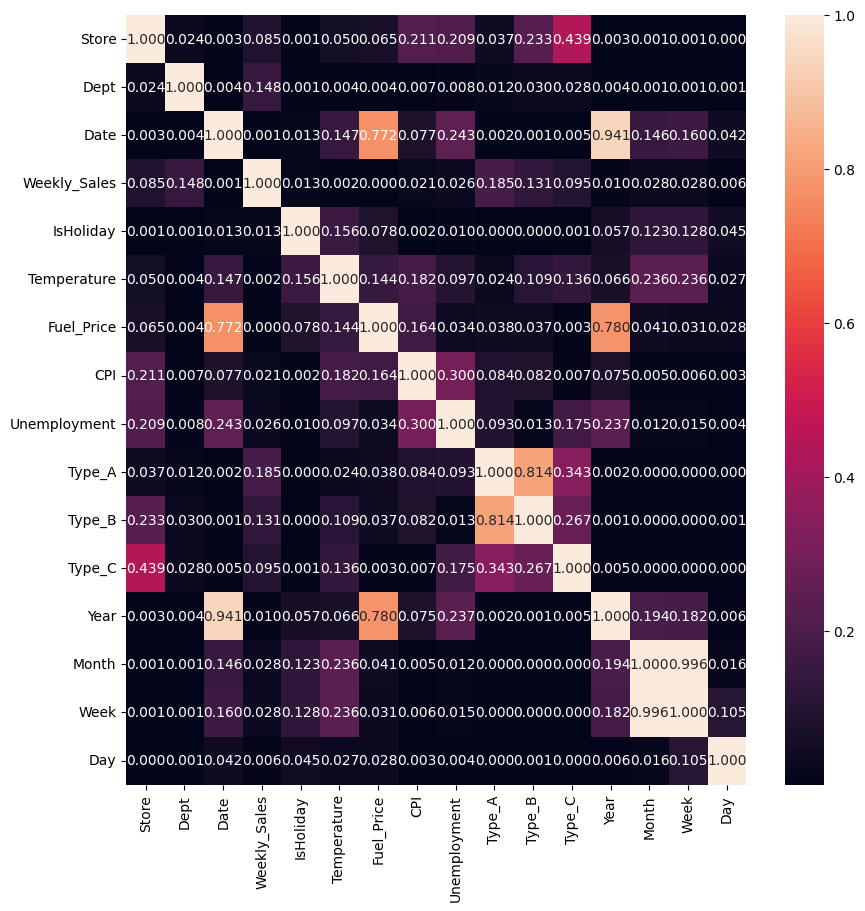

In [22]:
corr = df.corr()
corr = abs(corr)
plt.figure(figsize=(10,10))
sns.heatmap(corr,
            annot=True, fmt=".3f",
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

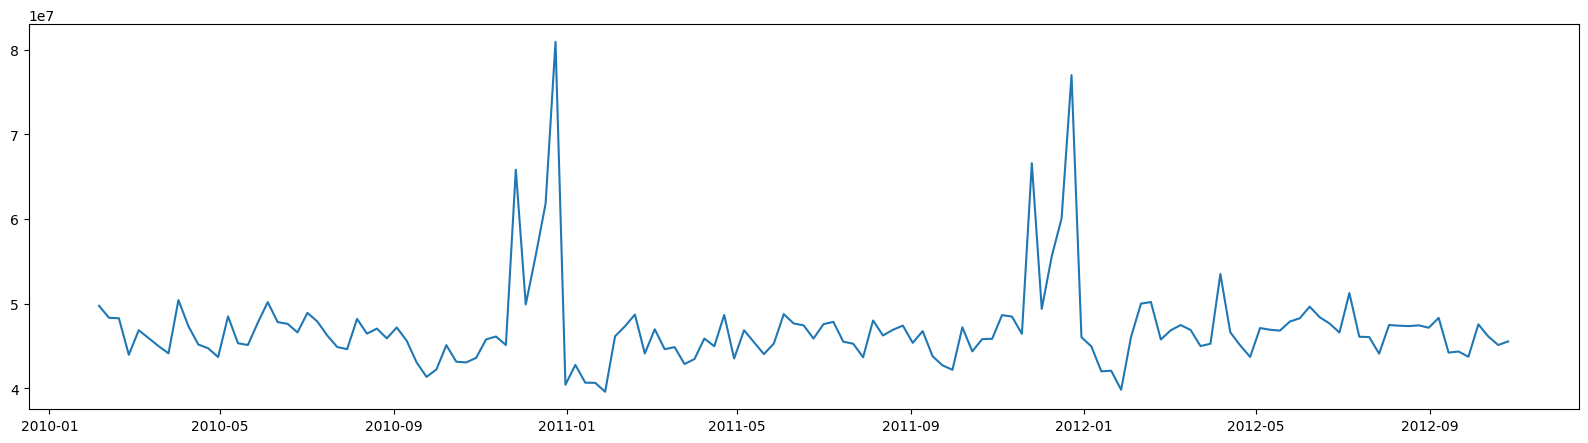

In [23]:
df_average_sales_week = df.groupby(by=['Date'], as_index=False)['Weekly_Sales'].sum()
df_average_sales = df_average_sales_week.sort_values('Weekly_Sales', ascending=False)

plt.figure(figsize=(20,5))
plt.plot(df_average_sales_week.Date, df_average_sales_week.Weekly_Sales)
plt.show()

Text(0, 0.5, 'Sales')

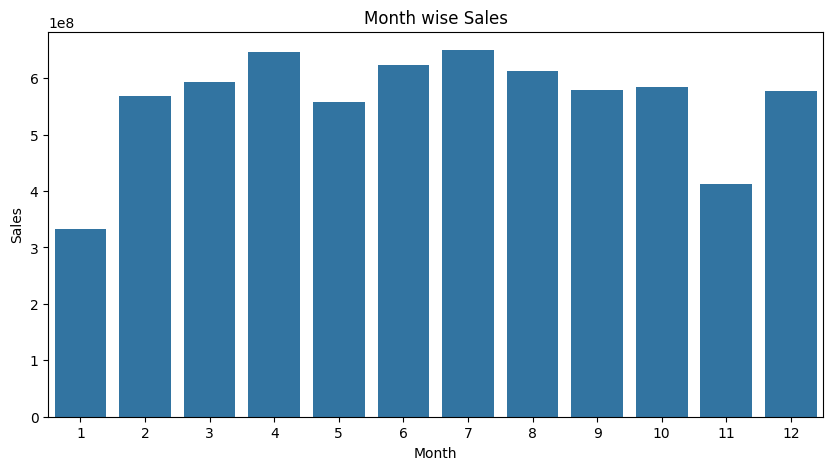

In [26]:
data_sales_month = df.groupby(df['Month']).agg({"Weekly_Sales":"sum"})
plt.figure(figsize=(10, 5))
sns.barplot(x=data_sales_month.index,y=data_sales_month.Weekly_Sales)
plt.title("Month wise Sales")
plt.xlabel("Month")
plt.ylabel("Sales")

Text(0, 0.5, 'Sales')

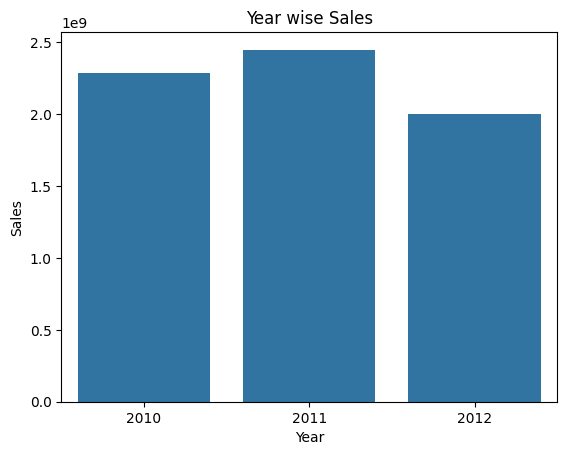

In [27]:
data_sales_year = df.groupby(df['Year']).agg({"Weekly_Sales":"sum"})

sns.barplot(x=data_sales_year.index,y=data_sales_year.Weekly_Sales)
plt.title("Year wise Sales")
plt.xlabel("Year")
plt.ylabel("Sales")

In [28]:
data_Dept = df.groupby("Dept").agg({"Weekly_Sales":"sum"})
data_Dept.Weekly_Sales = data_Dept.Weekly_Sales/10000
data_Dept.Weekly_Sales = data_Dept.Weekly_Sales.apply(int)
data_Dept.sort_values(by="Weekly_Sales")

,Weekly_Sales
Dept,
78,0
47,0
43,0
39,0
51,3
...,...
90,29106
72,30572
38,39311


Text(0.5, 0, 'Department')

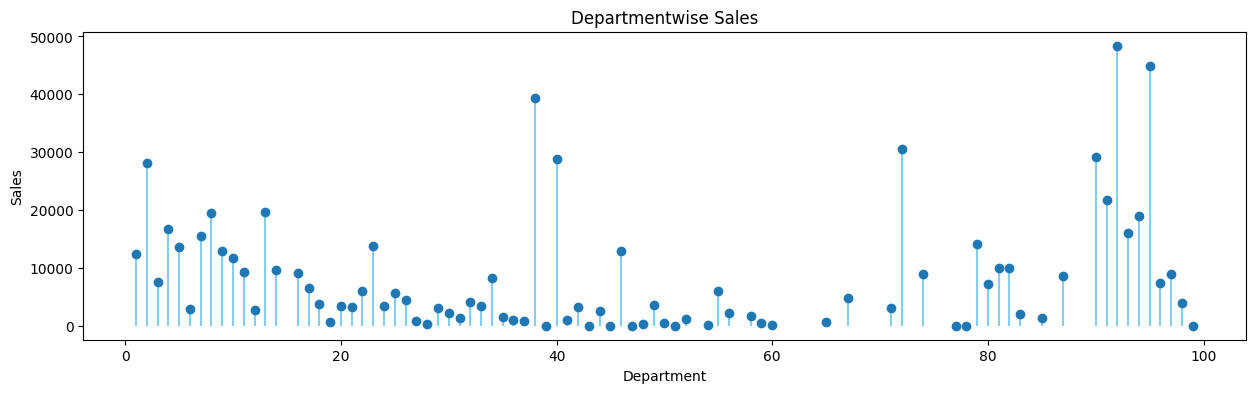

In [29]:
fig1, ax1 = plt.subplots(figsize=(15, 4))
plt.vlines(x=data_Dept.index, ymin=0, ymax=data_Dept['Weekly_Sales'], color='skyblue')
plt.plot(data_Dept.index,data_Dept['Weekly_Sales'], "o")
plt.title("Departmentwise Sales")
plt.ylabel("Sales")
plt.xlabel("Department")

In [30]:
X = df.drop(columns=['Weekly_Sales', 'Date'])
y = df['Weekly_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 13247410.64423273


In [31]:
df_next_year = df.copy()
df_next_year['Date'] = df_next_year['Date'] + pd.DateOffset(years=1)


df_next_year['Year'] = df_next_year['Date'].dt.year
df_next_year['Month'] = df_next_year['Date'].dt.month
df_next_year['Week'] = df_next_year['Date'].dt.isocalendar().week
df_next_year['Day'] = df_next_year['Date'].dt.day


In [32]:
X_next_year = df_next_year.drop(columns=['Weekly_Sales', 'Date'])

df_next_year['Predicted_Weekly_Sales'] = rf.predict(X_next_year)

In [33]:
department_sales_predictions = df_next_year.groupby(['Store', 'Dept', 'Year', 'Month'])['Predicted_Weekly_Sales'].sum().reset_index()


In [36]:
print(department_sales_predictions)


        Store  Dept  Year  Month  Predicted_Weekly_Sales
0           1     1  2011      2             136053.4348
1           1     1  2011      3             100817.4326
2           1     1  2011      4             146375.4924
3           1     1  2011      5              66923.3896
4           1     1  2011      6              66615.0291
...       ...   ...   ...    ...                     ...
100176     45    98  2013      6               3826.9034
100177     45    98  2013      7               2707.9547
100178     45    98  2013      8               2678.7162
100179     45    98  2013      9               2105.8537
100180     45    98  2013     10               3129.7788

[100181 rows x 5 columns]


In [37]:
department_sales_predictions.to_csv('department_sales_predictions_next_year.csv', index=False)


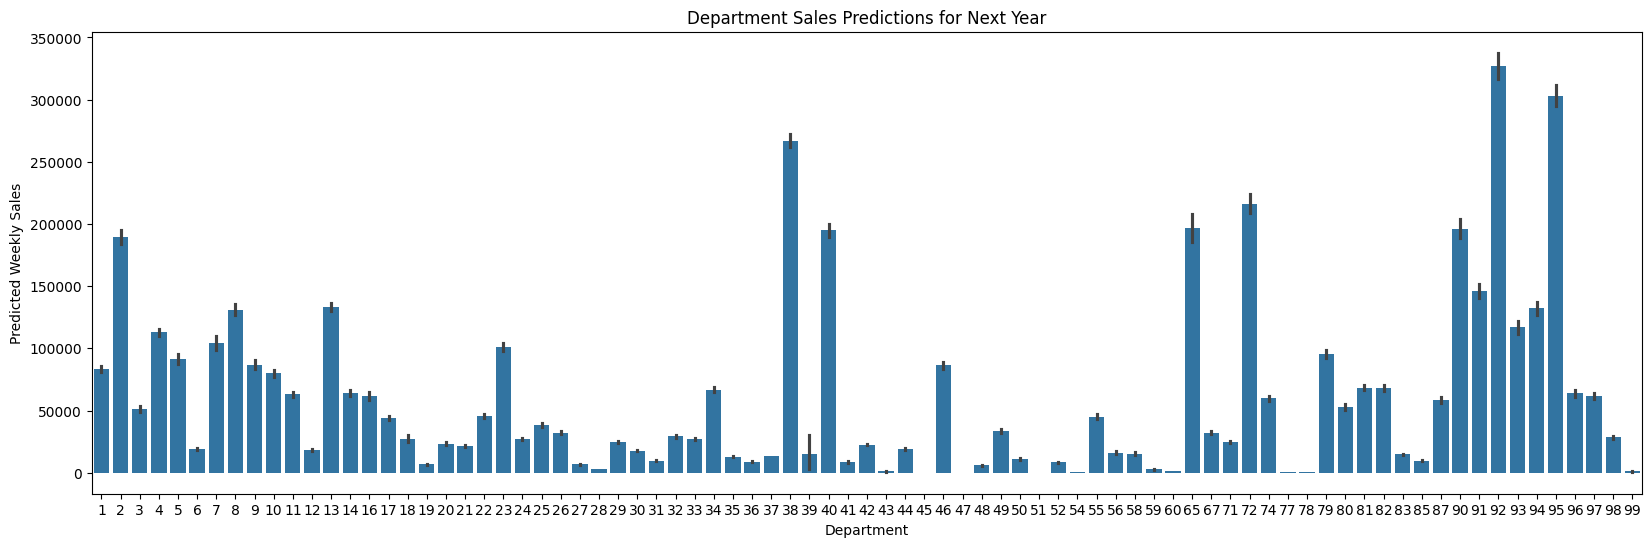

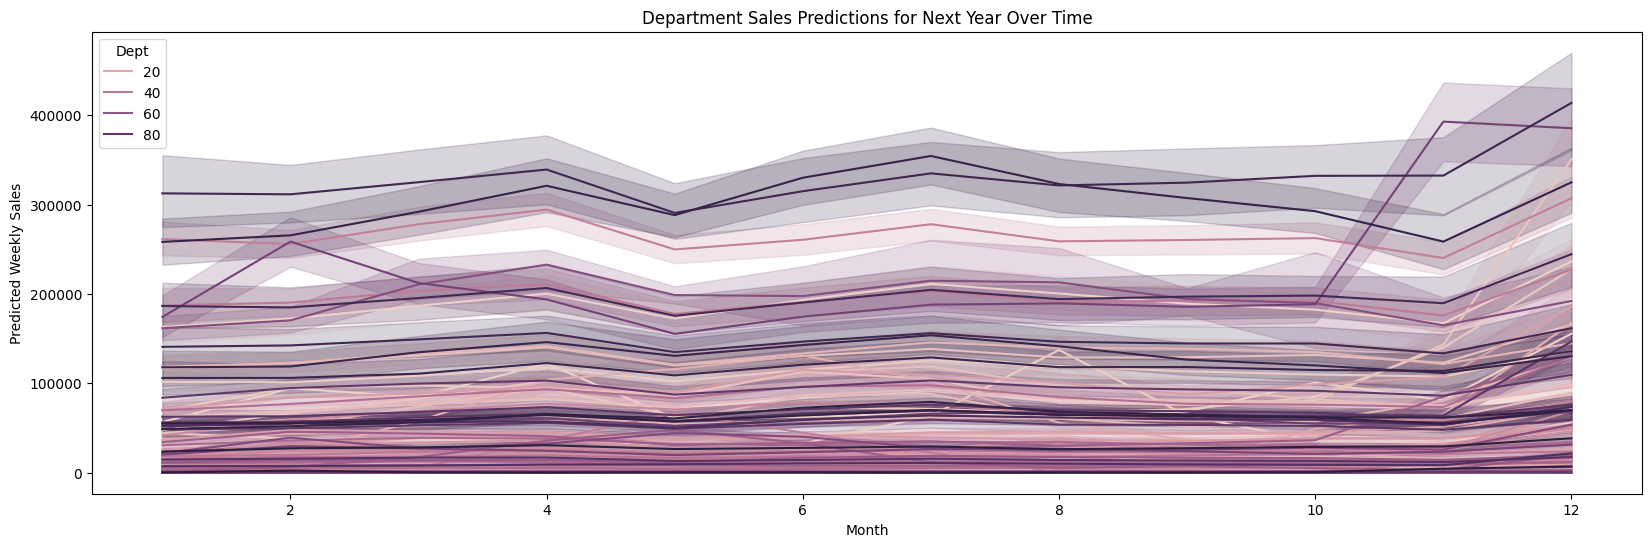

In [45]:

plt.figure(figsize=(20, 6))
sns.barplot(x="Dept", y="Predicted_Weekly_Sales", data=department_sales_predictions)
plt.title("Department Sales Predictions for Next Year")
plt.xlabel("Department")
plt.ylabel("Predicted Weekly Sales")
plt.show()

plt.figure(figsize=(20, 6))
sns.lineplot(x="Month", y="Predicted_Weekly_Sales",hue='Dept', data=department_sales_predictions)
plt.title("Department Sales Predictions for Next Year Over Time")
plt.xlabel("Month")
plt.ylabel("Predicted Weekly Sales")
plt.show()


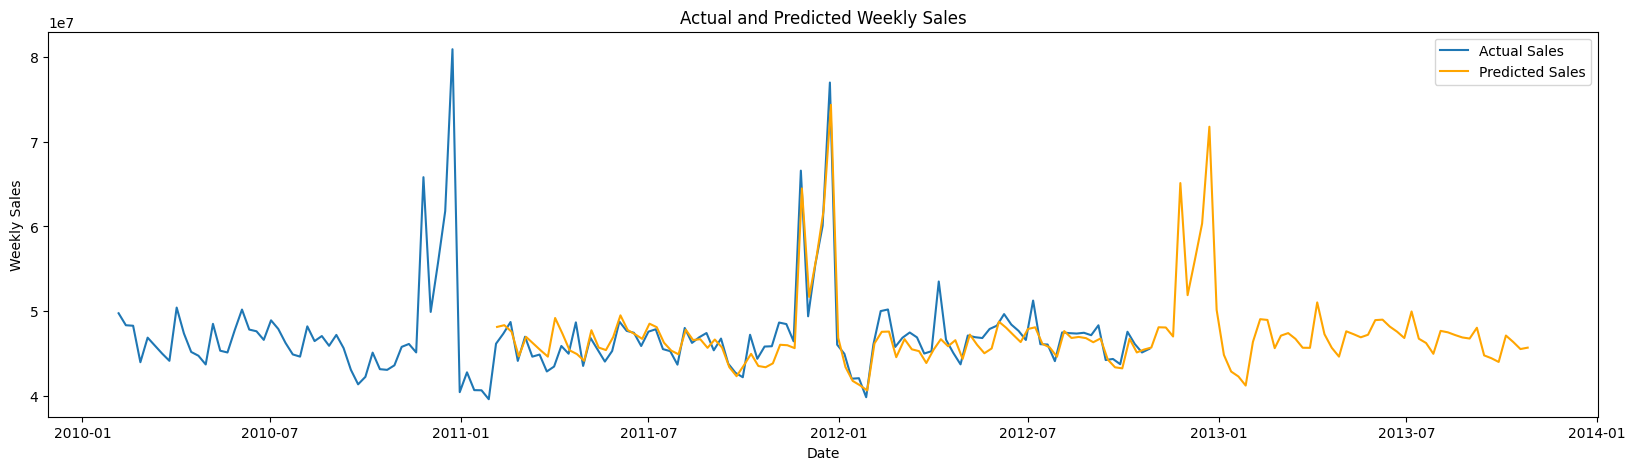

In [48]:

plt.figure(figsize=(20, 5))
plt.plot(df_average_sales_week.Date, df_average_sales_week.Weekly_Sales, label="Actual Sales")

df_next_year_sales = df_next_year.groupby(by=['Date'], as_index=False)['Predicted_Weekly_Sales'].sum()
plt.plot(df_next_year_sales.Date, df_next_year_sales.Predicted_Weekly_Sales, label="Predicted Sales", color="orange")

plt.title("Actual and Predicted Weekly Sales")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.legend()
plt.show()


In [51]:

from prophet import Prophet

df_prophet = df[['Date', 'Weekly_Sales']]
df_prophet = df_prophet.rename(columns={'Date': 'ds', 'Weekly_Sales': 'y'})

model_prophet = Prophet()
model_prophet.fit(df_prophet)

future_dates = pd.date_range(start=df_prophet['ds'].max() + pd.DateOffset(1), periods=52, freq='W')
future_df = pd.DataFrame({'ds': future_dates})
forecast_prophet = model_prophet.predict(future_df)

print(forecast_prophet[['ds', 'yhat']].head())


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuqimf2cx/3f04g894.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuqimf2cx/w4mtl8k7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16333', 'data', 'file=/tmp/tmpuqimf2cx/3f04g894.json', 'init=/tmp/tmpuqimf2cx/w4mtl8k7.json', 'output', 'file=/tmp/tmpuqimf2cx/prophet_model60yipkkl/prophet_model-20240616212512.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:25:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:25:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


          ds          yhat
0 2012-10-28  15362.566423
1 2012-11-04  16096.334557
2 2012-11-11  17081.820207
3 2012-11-18  17780.739363
4 2012-11-25  18254.442518
